In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cd /content/drive/MyDrive/

In [8]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [10]:
data = pd.read_excel('/content/drive/MyDrive/Dataset.xlsx')
print(data.head())

                          Comments Annotation
0  Awsome movie.... Love it......    positive
1                       Cool movie   positive
2                     ing... Movie   negative
3      Ritu arya smashed her role    negative
4             I watched Red Notice   positive


In [11]:
def remove_tags(string):
    removelist = ""
    try:
        result = re.sub('','',string)          #remove HTML tags
        result = re.sub('https://.*','',result)   #remove URLs
        result=result.replace(".","")
        result = result.lower()
        return result
    except:
        result = str(string).lower()
        return result

data['Comments']=data['Comments'].apply(lambda cw : remove_tags(cw))

In [12]:
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['Comments'] = data.Comments.apply(lemmatize_text)
print(data.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


                      Comments Annotation
0        awsome movie love it    positive
1                  cool movie    positive
2                   ing movie    negative
3  ritu arya smashed her role    negative
4        i watched red notice    positive


In [13]:
s = 0.0
word_max=[]
for i in data['Comments']:
    word_list = i.split()
    word_max.append(len(word_list))
    s = s + len(word_list)
print("Average length of each review : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['Annotation'] == 'positive':
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/data.shape[0]*100)+"%")
data['Annotation'][1091]='negative'
Comments = data['Comments'].values
labels = data['Annotation'].values
print(labels)

Average length of each review :  15.697581451129322
Percentage of reviews with positive sentiment is 38.117129722166695%
Percentage of reviews with negative sentiment is 61.882870277833305%
['positive' 'positive' 'negative' ... 'Postive' 'positive' 'positive']


In [14]:
max(word_max)
data['Annotation'][1091]

'negative'

In [15]:
Comments[0]
print(type(Comments))

<class 'numpy.ndarray'>


In [16]:
print("Total size of lables",len(labels))
correct_labels=[]
final_Comments=[]
count=0
lenght=len(labels)
print("Total lenght",lenght)
for i in labels:
  temp=str(i)
  if(temp.startswith('q')==True):
    correct_labels.append(str("question"))
    final_Comments.append(Comments[count])
    count=count+1
    continue
  if(temp.startswith('s')==True):
    correct_labels.append(str("suggestion"))
    final_Comments.append(Comments[count])
    count=count+1
    continue
  if((temp.startswith('nega')==True) or (temp==' negative')):
    correct_labels.append(str("negative"))
    final_Comments.append(Comments[count])
    count=count+1
    continue
  if((temp.startswith('post')==True) or (temp==('posive'))or (temp==('poitive')) or(temp=='Postive')or(temp==('positive'))):
    correct_labels.append(str("positive"))
    final_Comments.append(Comments[count])
    count=count+1
    continue
  if(temp.startswith('neu')==True):
    correct_labels.append(str("neutral"))
    final_Comments.append(Comments[count])
    count=count+1
    continue
  if(temp=='nan'):
    np.delete(Comments, count) 
    count=count+1
    continue
  if(temp==' '):
    test=count
    np.delete(Comments, count) 
    print('test',test)
    continue 
  else:
    correct_labels.append(str(temp))
    count=count+1
    print("else",temp,count)
print(correct_labels)
print(count)

Total size of lables 15009
Total lenght 15009
test 1890
['positive', 'positive', 'negative', 'negative', 'positive', 'suggestion', 'question', 'question', 'positive', 'suggestion', 'positive', 'suggestion', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'question', 'positive', 'positive', 'positive', 'positive', 'positive', 'suggestion', 'positive', 'negative', 'positive', 'positive', 'positive', 'question', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'neutral', 'question', 'negative', 'suggestion', 'negative', 'question', 'question', 'positive', 'positive', 'positive', 'positive', 'question', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'suggestion', 'neutral', 'question', 'suggestion', 'positive', 'question', 'positive', 'positive', 'positive', 'positive', 'suggestion', 'positive', 'positive', 'questi

In [17]:
correct_labels[1091]='negative'
correct_labels[1893]='negative'
print(len(correct_labels))
print(len(final_Comments))


14911
14911


In [18]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(correct_labels)
# print(*encoded_labels)
from keras.utils import to_categorical
encoded_labels = to_categorical(encoded_labels, dtype ="uint8")
print(*encoded_labels)

[0 0 1 0 0] [0 0 1 0 0] [1 0 0 0 0] [1 0 0 0 0] [0 0 1 0 0] [0 0 0 0 1] [0 0 0 1 0] [0 0 0 1 0] [0 0 1 0 0] [0 0 0 0 1] [0 0 1 0 0] [0 0 0 0 1] [1 0 0 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [1 0 0 0 0] [0 0 1 0 0] [0 0 0 1 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 0 0 1] [0 0 1 0 0] [1 0 0 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 0 1 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [1 0 0 0 0] [1 0 0 0 0] [0 0 1 0 0] [0 1 0 0 0] [0 0 0 1 0] [1 0 0 0 0] [0 0 0 0 1] [1 0 0 0 0] [0 0 0 1 0] [0 0 0 1 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 0 1 0] [0 1 0 0 0] [0 1 0 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 0 0 1] [0 1 0 0 0] [0 0 0 1 0] [0 0 0 0 1] [0 0 1 0 0] [0 0 0 1 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 0 0 1] [0 0 1 0 0] [0 0 1 0 0] [0 0 0 1 0] [0 0 1 0 0] [0 0 1 0 0] [0 0 0 0 1] [0 0 1 0 0] [0 0 1 0 0] [0 0

In [19]:
print(list(encoder.classes_))

['negative', 'neutral', 'positive', 'question', 'suggestion']


In [20]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(final_Comments, encoded_labels)

In [21]:
print(len(train_sentences))
print(len(test_sentences))
print(len(train_labels))
print(len(test_labels))

11183
3728
11183
3728


In [22]:
# Hyperparameters of the model
vocab_size = 4000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 1068 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from spacy.lang.en.stop_words import STOP_WORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
import tensorflow as tf
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=adam, 
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1068, 100)         400000    
                                                                 
 bidirectional (Bidirectiona  (None, 1068, 128)        84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1068, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

In [24]:
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=15,
    verbose=1,
    batch_size=64
)

model.save('/content/drive/MyDrive/sentiment.h5')

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


175/175 [==============================] - 63s 279ms/step - loss: 0.4388 - accuracy: 0.4174
Epoch 2/15
175/175 [==============================] - 33s 191ms/step - loss: 0.4094 - accuracy: 0.4972
Epoch 3/15
175/175 [==============================] - 26s 147ms/step - loss: 0.3888 - accuracy: 0.5298
Epoch 4/15
175/175 [==============================] - 25s 145ms/step - loss: 0.3736 - accuracy: 0.5559
Epoch 5/15
175/175 [==============================] - 24s 137ms/step - loss: 0.3579 - accuracy: 0.5790
Epoch 6/15
175/175 [==============================] - 24s 136ms/step - loss: 0.3467 - accuracy: 0.5940
Epoch 7/15
175/175 [==============================] - 24s 140ms/step - loss: 0.3352 - accuracy: 0.6043
Epoch 8/15
175/175 [==============================] - 22s 125ms/step - loss: 0.3251 - accuracy: 0.6226
Epoch 9/15
175/175 [==============================] - 23s 134ms/step - loss: 0.3134 - accuracy: 0.6334
Epoch 10/15
175/175 [==============================] - 22s 125ms/step - loss: 0.3054

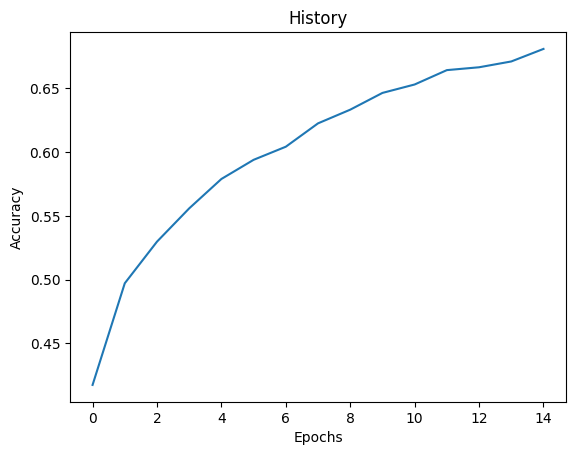

In [25]:
import matplotlib.pyplot as plt
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")

In [43]:
from numpy import argmax
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
  list1=list(i)
  num=list1.index(max(list1))
  pred_labels.append(num)

for i,j in enumerate(pred_labels):
  temp=dict[j]
  print("Sentemce:", test_sentences[i])
  print("Predicted:", temp)
  print("Actual Label:",encoder.inverse_transform([argmax(test_labels[i])]))
  print("||=====================================||")

Streaming output truncated to the last 5000 lines.
Sentemce: bill gate watching this after his divorce lol 
Predicted: positive
Actual Label: ['negative']
||=====================================||
Sentemce: gate started out in 1972 you left that out 
Predicted: question
Actual Label: ['suggestion']
||=====================================||
Sentemce: this guy is not a human 
Predicted: suggestion
Actual Label: ['negative']
||=====================================||
Sentemce: he is so cute 
Predicted: positive
Actual Label: ['positive']
||=====================================||
Sentemce: elon musk bbe like 
Predicted: suggestion
Actual Label: ['suggestion']
||=====================================||
Sentemce: i’m not mad at him or the company the only criticism i have is the treatment of the worker in the warehouse 
Predicted: suggestion
Actual Label: ['negative']
||=====================================||
Sentemce: why doe no one talk about the blood on tom holland finger 
Predicted: sugge

In [44]:
print("Sentence:", test_sentences[1])
print("Actual Label:",encoder.inverse_transform([argmax(test_labels[1])]))

Sentence: he wa born to be a top star 
Actual Label: ['question']


In [53]:
from keras.models import load_model
model=load_model("/content/drive/MyDrive/sentiment.h5")

# reviews on which we need to predict
# sentence = ["Cool Movie", 
#             "He went to the jungle again", 
#             "the movie plot is terrible but it had good acting"]
sentence=["He is a VERY sexy man and I love the film Hercules especially when I heard that when chained and made to look like he was fighting to break free he actually told them not to make the chains weak but as they should be so he could really go for it. On one take he actually passed out with effort so when you watch that film just remember that what you are seeing is really Dwayne giving it his all    what a guy "]

dict={0:'negative', 1:'neutral',2: 'positive',3: 'question',4:'suggestion'}
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
print(sequences)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
labels=[]
for i in prediction:
  list1=list(i)
  num=list1.index(max(list1))
  labels.append(num)
for i,j in enumerate(labels):
  temp=dict[j]
  print("Sentemce: ",sentence[i])
  print("Predicted:", temp)

[[9, 3, 4, 96, 1968, 45, 6, 7, 34, 2, 659, 1, 565, 57, 7, 576, 12, 57, 1, 6, 113, 5, 74, 22, 9, 1, 1337, 5, 842, 443, 9, 237, 518, 107, 17, 5, 71, 2, 1, 1541, 25, 594, 29, 100, 20, 21, 9, 155, 102, 69, 15, 13, 24, 41, 140, 9, 237, 1860, 82, 27, 998, 21, 57, 10, 217, 12, 659, 32, 373, 12, 30, 10, 16, 749, 3, 102, 316, 587, 13, 19, 26, 30, 4, 101]]
1/1 [==============================] - 4s 4s/step
Sentemce:  He is a VERY sexy man and I love the film Hercules especially when I heard that when chained and made to look like he was fighting to break free he actually told them not to make the chains weak but as they should be so he could really go for it. On one take he actually passed out with effort so when you watch that film just remember that what you are seeing is really Dwayne giving it his all    what a guy 
Predicted: positive
